<a href="https://colab.research.google.com/github/adilsonvj/SME0130---Redes-Complexas-/blob/main/Redes_Complexas_Question%C3%A1rio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://web.icmc.usp.br/SCAPINST/identidade_visual/logomarca/LOGO%20ICMC%20RGB.png" height="200"/>
</div>

# Questionário: – Centralidade

**Disciplina**: Redes Complexas SME0130 / 1º Semestre 2021
**Professor**: Francisco Rodrigues
**Aluno**: Adilson Vital Junior
**Número** USP: 9278160

In [125]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats

def get_first_lines(file_path, n_lines = 5):
  """
    Inputs:
      - file_path: string with the file path
      - n_lines: number of lines to print
    Outputs:
      - first "n_lines" of the file located in "file_path"
  """
  with open(file_path, "r") as file:
    count = 0
    for line in file:
      if count == n_lines:
        break
      else:
        print(line)
        count = count + 1

def create_network_by_txt(file_path, weighted = False):
  """
    Inputs:
      - file_path: File with the path of the .txt file for the graph
      - weighted: Bool variable if the network is weighted or not.
    Outputs:
      - G: Graph already loaded 
  """
  G = nx.Graph()
  with open(file_path,"r") as file:
    for line in file: 
      line = line.replace("\n", "").split(" ")
      if weighted:
        G.add_edge(line[0], line[1], weight = line[2])
      else:
        G.add_edge(line[0], line[1])
  return G

def plot_network(G):
  """
    Inputs:
      - G: Graph to plot
    Outputs:
      - Return the plot of the network G
  """
  plt.figure(figsize=(10,5))
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, node_size = 200, node_color = "yellow", pos = pos, alpha= 0.5)
  nx.draw_networkx_edges(G, width = 0.5, pos = pos, alpha = 0.5)
  nx.draw_networkx_labels(G, pos = pos, font_weight = "bold")
  plt.show()

def get_network_description(G):
  print("A rede é formada por", len(G.nodes()), "Nós e", len(G.edges()), "Arestas")

def preprocess_graph(G, to_undirected = True, remove_selfloop = True, major_component = True, relabel = True):
  """
    Inputs:
      - G: Graph to be preprocessed
    Outputs:
      - G: Graph already preprocessed
  """
  if to_undirected:
    G = G.to_undirected()
  if remove_selfloop:
    G.remove_edges_from(nx.selfloop_edges(G))
  if major_component:
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
  if relabel:
    G = nx.convert_node_labels_to_integers(G, first_label=0)
  return G


### **1. A média da medida eigenvector centrality da rede USairport500 é igual a quanto? Considere apenas o maior componente.**

Primeiro, vamos abrir os dados e printar as primeiras 5 linhas de forma a entender o que está contido nestes dados.

In [126]:
path_usairport = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/USairport500.txt"
get_first_lines(path_usairport, n_lines = 5)

1 111

1 49

1 283

1 177

1 72



As linhas são formadas por origem e destino, sem a presença de pesos.

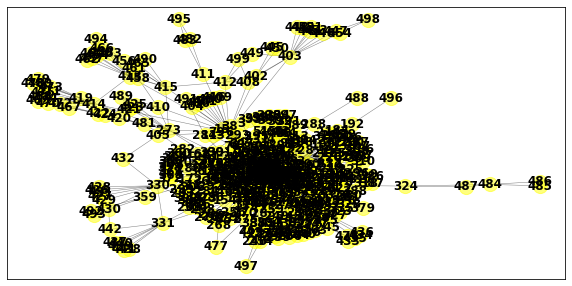

A rede é formada por 500 Nós e 2980 Arestas


In [127]:
G_usair = create_network_by_txt(path_usairport, weighted = False)
G_usair_ppg = preprocess_graph(G_usair)
plot_network(G_usair_ppg)
get_network_description(G_usair_ppg)

In [128]:
avg_eigen_centrality = np.mean(list(nx.eigenvector_centrality(G_usair_ppg).values()))

print("The avarage eigenvector centrality for USairport500 is %.5f"%avg_eigen_centrality)

The avarage eigenvector centrality for USairport500 is 0.02275


### **2. Calcule a correlação de Pearson entre a medida betweeness centrality e grau para a rede hamsterster.**

Assim como no arquivo anterior, vamos novamente observar as primeiras linhas do arquivo para entender os nossos dados.

In [129]:
path_hamsterster = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/hamsterster.txt"
get_first_lines(path_hamsterster, n_lines = 5)

99 98

999 550

999 42

999 25

998 996



Novamente a rede é formada apenas por nós de origem e destino, portanto sem pesos.

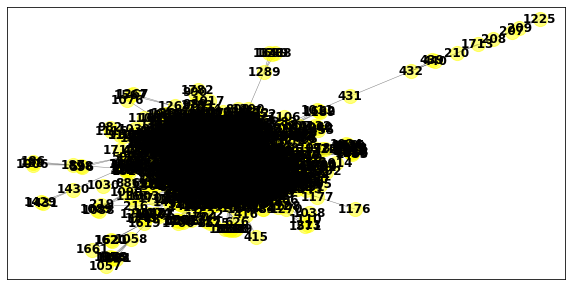

A rede é formada por 1788 Nós e 12476 Arestas


In [130]:
G_hams = create_network_by_txt(path_hamsterster, weighted = False)
G_hams_ppg = preprocess_graph(G_hams)
plot_network(G_hams_ppg)
get_network_description(G_hams_ppg)

primeiro vamos calcular a betweeness centrality de cada nó e seus respectivos graus.

In [131]:
betweenness = list(nx.betweenness_centrality(G_hams_ppg).values())
degree = list(dict(G_hams_ppg.degree()).values())

Calculado, vamos achar o coeficiente de Pearson entre ambas medidas

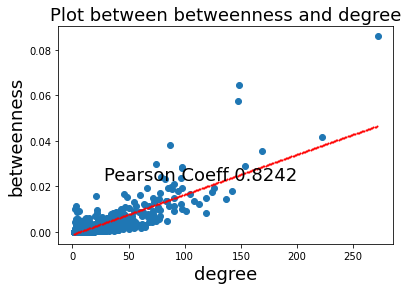

In [132]:
def plot_xy_rho(x_arr, y_arr, x_label, y_label):
  plt.scatter(x_arr, y_arr)
  plt.xlabel(x_label, fontsize = 18)
  plt.ylabel(y_label, fontsize = 18)
  plt.title("Plot between "+y_label+" and "+ x_label, fontsize = 18)
  coef = np.polyfit(x_arr, y_arr, 1)
  poly1d_fn = np.poly1d(coef) 
  x = np.arange(min(x_arr), max(x_arr))
  y = poly1d_fn(x)
  plt.scatter(x, y, s = 1, c = "red")
  rho, _ = pearsonr(x_arr, y_arr)
  plt.text(x[int(len(x)/10)], y[int(len(x)/2)], "Pearson Coeff %.4f"%rho, fontsize = 18)
  plt.show()

plot_xy_rho(degree, betweenness, "degree", "betweenness")

Como é possível ver, o coeficiente de Pearson entre betweeness centrality e o grau da rede Hamsterster é 0.8242

### **3. Calcule o coeficiente de correlação de Spearman entre as medidas closeness centrality e k-core para a rede "Jazz".**

Primeiro vamos verificar nossos dados com as primeiras linhas

In [133]:
path_jazz = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/jazz.txt"
get_first_lines(path_jazz, n_lines = 5)

1 8

1 24

1 35

1 42

1 46



Assim como os outros, nossos dados são formados por nó de origem e nó de destino

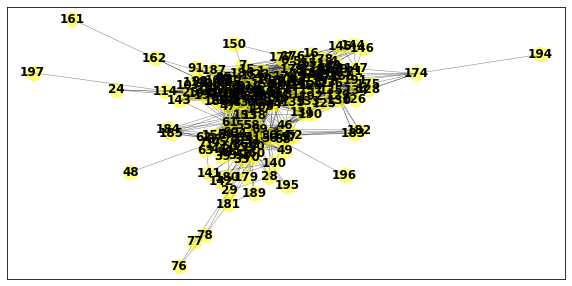

A rede é formada por 198 Nós e 2742 Arestas


In [134]:
G_jazz = create_network_by_txt(path_jazz, weighted = False)
G_jazz_ppg = preprocess_graph(G_jazz)
plot_network(G_jazz_ppg)
get_network_description(G_jazz_ppg)

Com isso em mãos, vamos calcular o closeness centrality e o respectivo K-core de cada um dos nós.

In [135]:
closeness_centrality = list(dict(nx.closeness_centrality(G_jazz_ppg)).values())

In [136]:
kcore = list(dict(nx.core_number(G_jazz_ppg)).values())

Com os dados em mãos vamos fazer o scatter plot entre ambos e colher o coeficiente de Spearman 

O coeficiente de spearman entre closeness centrality e K-core é 0.7353


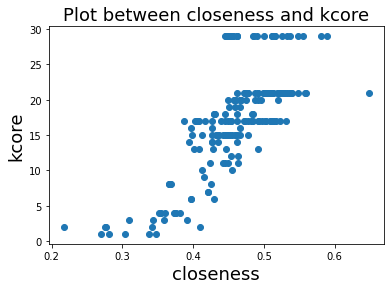

In [137]:
plt.scatter(closeness_centrality, kcore)
plt.xlabel("closeness", fontsize = 18)
plt.ylabel("kcore", fontsize = 18)
plt.title("Plot between closeness and kcore", fontsize = 18)
spearman_coeff, _ = stats.spearmanr(closeness_centrality, kcore)
print("O coeficiente de spearman entre closeness centrality e K-core é %.4f"%spearman_coeff)
plt.show()